# Working with sparse tensors

## 1. Sparse tensors in TensorFlow

## 2. Creating a tf.SparseTensor

In [1]:
import tensorflow as tf

print("The version of Tensorflow: {}".format(tf.__version__))

The version of Tensorflow: 2.4.1


In [2]:
st1 = tf.SparseTensor(indices=[[0, 3], [2, 4]],
                      values=[10, 20],
                      dense_shape=[3, 10])

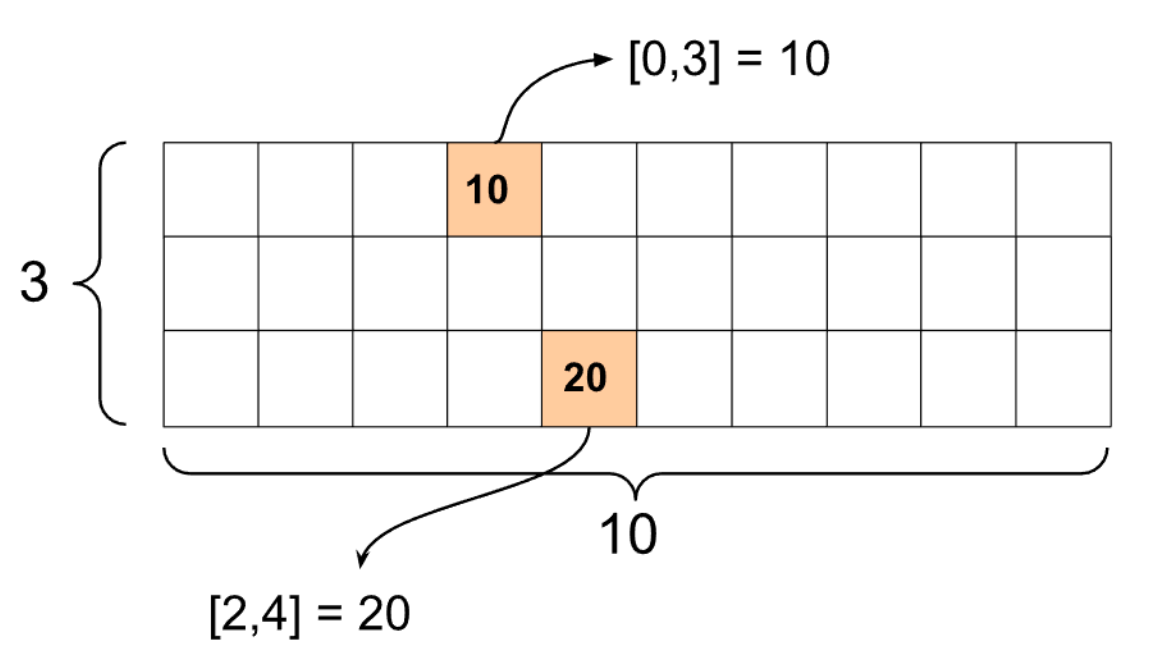

In [3]:
from IPython.display import Image, display
display(Image(filename="./image/sparsetensor1.png", embed=True))

In [5]:
# When you use the print() function to print a sparse tensor, it shows the contents of the three component tensors:

print(st1)

SparseTensor(indices=tf.Tensor(
[[0 3]
 [2 4]], shape=(2, 2), dtype=int64), values=tf.Tensor([10 20], shape=(2,), dtype=int32), dense_shape=tf.Tensor([ 3 10], shape=(2,), dtype=int64))


In [6]:
# It is easier to understand the contents of a sparse tensor if the nonzero values are aligned with their corresponding indices. 
# Define a helper function to pretty-print sparse tensors such that each nonzero value is shown on its own line.

def pprint_sparse_tensor(st):
  s = "<SparseTensor shape=%s \n values={" % (st.dense_shape.numpy().tolist(),)
  for (index, value) in zip(st.indices, st.values):
    s += f"\n  %s: %s" % (index.numpy().tolist(), value.numpy().tolist())
  return s + "}>"

In [8]:
print(pprint_sparse_tensor(st1))

<SparseTensor shape=[3, 10] 
 values={
  [0, 3]: 10
  [2, 4]: 20}>


In [9]:
# You can also construct sparse tensors from dense tensors by using tf.sparse.from_dense, 
# and convert them back to dense tensors by using tf.sparse.to_dense.


st2 = tf.sparse.from_dense([[1, 0, 0, 8], [0, 0, 0, 0], [0, 0, 3, 0]])
print(pprint_sparse_tensor(st2))

<SparseTensor shape=[3, 4] 
 values={
  [0, 0]: 1
  [0, 3]: 8
  [2, 2]: 3}>


In [10]:
st3 = tf.sparse.to_dense(st2)
print(st3)

tf.Tensor(
[[1 0 0 8]
 [0 0 0 0]
 [0 0 3 0]], shape=(3, 4), dtype=int32)


## 3. Manipulating sparse tensors

In [11]:
# Add sparse tensors of the same shape by using tf.sparse.add.

st_a = tf.SparseTensor(indices=[[0, 2], [3, 4]],
                       values=[31, 2], 
                       dense_shape=[4, 10])

st_b = tf.SparseTensor(indices=[[0, 2], [7, 0]],
                       values=[56, 38],
                       dense_shape=[4, 10])

st_sum = tf.sparse.add(st_a, st_b)

print(pprint_sparse_tensor(st_sum))

<SparseTensor shape=[4, 10] 
 values={
  [0, 2]: 87
  [3, 4]: 2
  [7, 0]: 38}>


In [12]:
# Use tf.sparse.sparse_dense_matmul to multiply sparse tensors with dense matrices.

st_c = tf.SparseTensor(indices=([0, 1], [1, 0], [1, 1]),
                       values=[13, 15, 17],
                       dense_shape=(2,2))

mb = tf.constant([[4], [6]])
product = tf.sparse.sparse_dense_matmul(st_c, mb)

print(product)

tf.Tensor(
[[ 78]
 [162]], shape=(2, 1), dtype=int32)


In [13]:
# Put sparse tensors together by using tf.sparse.concat and take them apart by using tf.sparse.slice.

sparse_pattern_A = tf.SparseTensor(indices = [[2,4], [3,3], [3,4], [4,3], [4,4], [5,4]],
                         values = [1,1,1,1,1,1],
                         dense_shape = [8,5])
sparse_pattern_B = tf.SparseTensor(indices = [[0,2], [1,1], [1,3], [2,0], [2,4], [2,5], [3,5], 
                                              [4,5], [5,0], [5,4], [5,5], [6,1], [6,3], [7,2]],
                         values = [1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                         dense_shape = [8,6])
sparse_pattern_C = tf.SparseTensor(indices = [[3,0], [4,0]],
                         values = [1,1],
                         dense_shape = [8,6])

sparse_patterns_list = [sparse_pattern_A, sparse_pattern_B, sparse_pattern_C]
sparse_pattern = tf.sparse.concat(axis=1, sp_inputs=sparse_patterns_list)
print(tf.sparse.to_dense(sparse_pattern))

tf.Tensor(
[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]], shape=(8, 17), dtype=int32)


In [14]:
sparse_slice_A = tf.sparse.slice(sparse_pattern_A, start = [0,0], size = [8,5])
sparse_slice_B = tf.sparse.slice(sparse_pattern_B, start = [0,5], size = [8,6])
sparse_slice_C = tf.sparse.slice(sparse_pattern_C, start = [0,10], size = [8,6])
print(tf.sparse.to_dense(sparse_slice_A))
print(tf.sparse.to_dense(sparse_slice_B))
print(tf.sparse.to_dense(sparse_slice_C))

tf.Tensor(
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]], shape=(8, 5), dtype=int32)
tf.Tensor(
[[0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]], shape=(8, 1), dtype=int32)
tf.Tensor([], shape=(8, 0), dtype=int32)


In [15]:
# If you're using TensorFlow 2.4 or above, 
# use tf.sparse.map_values for elementwise operations on nonzero values in sparse tensors.

st2_plus_5 = tf.sparse.map_values(tf.add, st2, 5)
print(tf.sparse.to_dense(st2_plus_5))

tf.Tensor(
[[ 6  0  0 13]
 [ 0  0  0  0]
 [ 0  0  8  0]], shape=(3, 4), dtype=int32)


In [16]:
# Note that only the nonzero values were modified – the zero values stay zero.

# Equivalently, you can follow the design pattern below for earlier versions of TensorFlow:

st2_plus_5 = tf.SparseTensor(
    st2.indices,
    st2.values + 5,
    st2.dense_shape)
print(tf.sparse.to_dense(st2_plus_5))

tf.Tensor(
[[ 6  0  0 13]
 [ 0  0  0  0]
 [ 0  0  8  0]], shape=(3, 4), dtype=int32)


## 4. Using tf.SparseTensor with other TensorFlow APIs

### i. tf.keras

In [17]:
# The example below shows you how to pass a sparse tensor as an input to a Keras model.

x = tf.keras.Input(shape=(4,), sparse=True)
y = tf.keras.layers.Dense(4)(x)
model = tf.keras.Model(x, y)

sparse_data = tf.SparseTensor(
    indices = [(0,0),(0,1),(0,2),
               (4,3),(5,0),(5,1)],
    values = [1,1,1,1,1,1],
    dense_shape = (6,4)
)

model(sparse_data)

model.predict(sparse_data)

array([[ 0.10808372, -0.4309196 , -0.8559625 , -0.6307212 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.2504061 , -0.6846572 , -0.7413109 , -0.42440736],
       [ 0.75587845, -0.47253203, -0.4193466 , -0.2005263 ]],
      dtype=float32)

### ii. tf.data

### Building datasets with sparse tensors

In [18]:
# Build datasets from sparse tensors using the same methods that are used to build them from tf.Tensors or NumPy arrays, 
# such as tf.data.Dataset.from_tensor_slices. 
# This op preserves the sparsity (or sparse nature) of the data.


dataset = tf.data.Dataset.from_tensor_slices(sparse_data)
for element in dataset: 
  print(pprint_sparse_tensor(element))

<SparseTensor shape=[4] 
 values={
  [0]: 1
  [1]: 1
  [2]: 1}>
<SparseTensor shape=[4] 
 values={}>
<SparseTensor shape=[4] 
 values={}>
<SparseTensor shape=[4] 
 values={}>
<SparseTensor shape=[4] 
 values={
  [3]: 1}>
<SparseTensor shape=[4] 
 values={
  [0]: 1
  [1]: 1}>


### Batching and unbatching datasets with sparse tensors

In [19]:
# You can batch (combine consecutive elements into a single element) and unbatch datasets with sparse tensors 
# using the Dataset.batch and Dataset.unbatch methods respectively.

batched_dataset = dataset.batch(2)
for element in batched_dataset:
  print (pprint_sparse_tensor(element))

<SparseTensor shape=[2, 4] 
 values={
  [0, 0]: 1
  [0, 1]: 1
  [0, 2]: 1}>
<SparseTensor shape=[2, 4] 
 values={}>
<SparseTensor shape=[2, 4] 
 values={
  [0, 3]: 1
  [1, 0]: 1
  [1, 1]: 1}>


In [20]:
unbatched_dataset = batched_dataset.unbatch()
for element in unbatched_dataset:
  print (pprint_sparse_tensor(element))

<SparseTensor shape=[4] 
 values={
  [0]: 1
  [1]: 1
  [2]: 1}>
<SparseTensor shape=[4] 
 values={}>
<SparseTensor shape=[4] 
 values={}>
<SparseTensor shape=[4] 
 values={}>
<SparseTensor shape=[4] 
 values={
  [3]: 1}>
<SparseTensor shape=[4] 
 values={
  [0]: 1
  [1]: 1}>


### Transforming Datasets with sparse tensors

In [21]:
# Transform and create sparse tensors in Datasets using Dataset.map.

transform_dataset = dataset.map(lambda x: x*2)
for i in transform_dataset:
  print(pprint_sparse_tensor(i))

<SparseTensor shape=[4] 
 values={
  [0]: 2
  [1]: 2
  [2]: 2}>
<SparseTensor shape=[4] 
 values={}>
<SparseTensor shape=[4] 
 values={}>
<SparseTensor shape=[4] 
 values={}>
<SparseTensor shape=[4] 
 values={
  [3]: 2}>
<SparseTensor shape=[4] 
 values={
  [0]: 2
  [1]: 2}>


### iii. tf.train.Example

### iv. tf.function

In [22]:
@tf.function
def f(x,y):
  return tf.sparse.sparse_dense_matmul(x,y)

a = tf.SparseTensor(indices=[[0, 3], [2, 4]],
                    values=[15, 25],
                    dense_shape=[3, 10])

b = tf.sparse.to_dense(tf.sparse.transpose(a))

c = f(a,b)

print(c)

tf.Tensor(
[[225   0   0]
 [  0   0   0]
 [  0   0 625]], shape=(3, 3), dtype=int32)


## 5. Distinguishing missing values from zero values

In [23]:
print(tf.sparse.reduce_max(tf.sparse.from_dense([-5, 0, -3])))

tf.Tensor(-3, shape=(), dtype=int32)


In [24]:
# In contrast, when you apply tf.math.reduce_max to a dense tensor, the output is 0 as expected

print(tf.math.reduce_max([-5, 0, -3]))

tf.Tensor(0, shape=(), dtype=int32)


## 6. Further reading and resources

# reference

### https://tensorflow.google.cn/guide/sparse_tensor